In [1]:
# install the opendatasets package
!pip install opendatasets
{"username":"algodata420","key":"8b0cb71fe7485ca4f2cc7cc8f957c2a5"}
import opendatasets as od

# download the dataset (this is a Kaggle dataset)
od.download("https://www.kaggle.com/mlg-ulb/creditcardfraud")

     ---------------------------------------- 83.6/83.6 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110697 sha256=aa54f6cdd186aacb7bb44e2242f6b8bc0650958ac372161b6dccd44547d0e2cd
  Stored in directory: c:\users\amit7\appdata\local\pip\cache\wheels\b2\3d\88\839f363f3ce6b71785b8a95627cd52cb5359e54aba76a7ab76
Successfully built kaggle
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: algodata420
Your Kaggle Key: ········


100%|█████████████████████████████████████████████████████████████████████████████| 66.0M/66.0M [00:08<00:00, 8.36MB/s]


# Import relevent library

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_auc_score
import time
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('creditcardfraud/creditcard.csv')
df.head()
                 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.shape

(284807, 31)

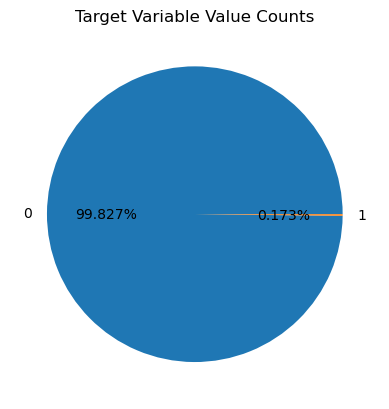

In [8]:
# get the set of distinct classes
labels =df.Class.unique()

# get the count of each class
sizes = df.Class.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()


''' In this pei chart , Very unbalanced data is shown , This data  is not suitable for model prediction because these 
cause the overfitting .
'''

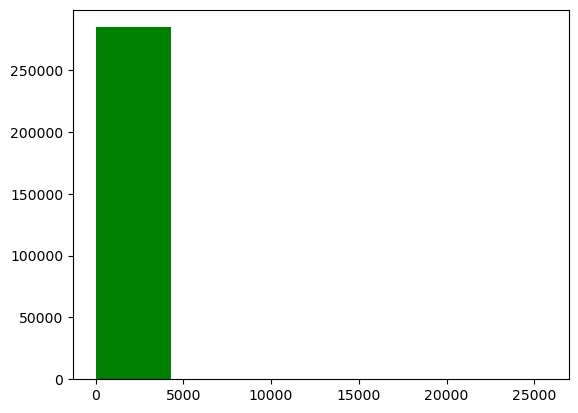

0.0
25691.16
203.0


In [15]:
plt.hist(df.Amount.values, 6, histtype='bar', facecolor='g')
plt.show()

print(np.min(df.Amount.values))
print(np.max(df.Amount.values))
print(np.percentile(df.Amount.values , 90))

# Dataset Preprocessing

In [19]:
df.iloc[:, 1:30] = StandardScaler().fit_transform(df.iloc[:, 1:30])
data_matrix =df.values

# X: feature matrix (for this analysis, we exclude the Time variable from the dataset)
X = data_matrix[:, 1:30]

# y: labels vector
y = data_matrix[:, 30]

# data normalization
X = normalize(X, norm="l1")

# print the shape of the features matrix and the labels vector
print('X.shape=', X.shape, 'y.shape=', y.shape)

X.shape= (284807, 29) y.shape= (284807,)


# Dataset Train/Test Split

In [28]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 42)
print(X_train.shape , y_train.shape , X_test.shape , y_test.shape)

(199364, 29) (199364,) (85443, 29) (85443,)


# Make Model

In [29]:
from sklearn.tree import DecisionTreeClassifier
w_train = compute_sample_weight('balanced', y_train)

model = DecisionTreeClassifier(max_depth = 4 , random_state = 35)

model.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=4, random_state=35)

In [30]:
model.score(X_test , y_test)

0.9987828142738434

# Evaluate the Scikit-Learn and Snap ML Decision Tree Classifier Models

In [33]:
sklearn_pred = model.predict_proba(X_test)[:,1]
sklearn_roc_auc = roc_auc_score(y_test, sklearn_pred)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc))

[Scikit-Learn] ROC-AUC score : 0.756


# Build a Support Vector Machine model with Scikit-Learn

In [34]:
from sklearn.svm import LinearSVC
model_1 = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)
model_1.fit(X_train , y_train)

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

In [36]:
sklearn_pred = model_1.decision_function(X_test)

# evaluate accuracy on test set
acc_sklearn  = roc_auc_score(y_test, sklearn_pred)
print("[Scikit-Learn] ROC-AUC score:   {0:.3f}".format(acc_sklearn))

[Scikit-Learn] ROC-AUC score:   0.986


# Note :- Support Vector Machine Model are Accuracy than Decision Tree
   # Because Accuracy of DT = 75.6 %
   # And SVM = 98.6 %

# Export this model in form of pickle file and json formate

In [39]:
import pickle

# Save the model to a file in pickle format
filename = 'fraud_detection_model.pkl'

with open(filename, 'wb') as file:
    pickle.dump(model_1, file)
